# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad de las Semanas 5 y 6**
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   Luis Sebastián Gan Cadena - A01186635

*   Carlos Pano Hernández - A01066264

*   Yocoyani



# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [343]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split 

from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

In [344]:
# Si se desean comentar algunos de los Warnings.
import warnings
warnings.filterwarnings('ignore')

In [345]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************
#leyendo la data
df = pd.read_csv('data/south+german+credit/SouthGermanCredit.asc', delim_whitespace=True)

#traduciendo columnas usando google translator y cambiando los nombres
translator = GoogleTranslator(source='de', target='en')
translated_cols = []
for col in df.columns:
    translated_cols.append(translator.translate(col))

df.columns = translated_cols

# *********** Aquí termina la sección de agregar código *************
df.head(5).T

,0,1,2,3,4
running account,1,1,2,1,1
duration,18,9,12,12,12
moral,4,4,2,4,4
used,2,0,9,0,0
height,1049,2799,841,2122,2171
savings account,1,1,2,1,1
time,2,3,4,3,3
rate,4,2,2,3,4
famges,2,3,2,3,3
guarantor,1,1,1,1,1


## **Ejercicio 2**

In [346]:
# Realiza a continuación una transformación para que la clase negativa (buen cliente)
# quede con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************
target_value = 'credit'

print(f"Revision de la data antes:")
print(df[target_value].value_counts())

dict_to_map = {0:1,
               1:0}

df[target_value] = df[target_value].map(dict_to_map)

# *********** Aquí termina la sección de agregar código *************

print(df[target_value].value_counts())

Revision de la data antes:
credit
1    700
0    300
Name: count, dtype: int64
credit
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [347]:
# Realiza una partición solicitada de entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

X = df.iloc[:,:-1]
y = df[[target_value]]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, shuffle=True, random_state=1, stratify=y)

# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva: %.2f%%, y Negativa: %.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700, 1)
Prueba: (300, 20) (300, 1)

Porcentaje clases Positiva: 70.00%, y Negativa: 30.00%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++
Sí, podemos afirmar que hay un problema de datos desbalanceados en este contexto de asignación de créditos. La variable de salida presenta un 70% de casos en los que se otorga el crédito (clase positiva) y un 30% donde no se otorga (clase negativa). Esta disparidad es significativa y puede tener varias implicaciones para el modelo de evaluación de riesgos.

1. **Impacto en la toma de decisiones**: La mayor representación de la clase positiva puede hacer que el modelo desarrolle una tendencia a predecir que los créditos siempre se otorgan. Esto puede resultar en una alta tasa de aciertos, pero también en una alta tasa de falsos positivos, donde se conceden créditos a personas que podrían no ser confiables.

2. **Riesgo financiero**: Si el modelo no identifica adecuadamente a los deudores de alto riesgo (clase negativa), el prestamista podría incurrir en pérdidas significativas debido a impagos. Por otro lado, si se niega el crédito a personas confiables, se pierde la oportunidad de ingresos.

3. **Consecuencias sociales**: La negativa a otorgar créditos puede perpetuar desigualdades, afectando desproporcionadamente a ciertos grupos de personas. Esto puede tener un impacto negativo en la reputación del prestamista y en la confianza del consumidor.

### **Recomendaciones para abordar el desbalance de clases**:

1. **Recolección de datos**: Si es posible, intenta recopilar más datos sobre la clase negativa (no se otorga el crédito) para equilibrar el conjunto de datos.

2. **Sobremuestreo**: Utiliza técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para generar ejemplos sintéticos de la clase negativa, lo que puede ayudar a equilibrar el conjunto de datos.

3. **Submuestreo**: Considera reducir el número de ejemplos de la clase positiva si no es viable aumentar la clase negativa. Esto debe hacerse con cuidado para no perder información valiosa.

4. **Uso de métricas adecuadas**: Evalúa el rendimiento del modelo utilizando métricas como el F1-score, la precisión y el recall, que son más informativas en contextos desbalanceados que la simple precisión.

5. **Modelos ajustados**: Implementa algoritmos que manejen bien el desbalance de clases, como árboles de decisión o modelos de ensemble que permiten ajustar la penalización en las clases.

6. **Análisis de riesgo**: Realiza un análisis de riesgo más profundo que considere no solo la tasa de aprobación, sino también la tasa de impagos y el impacto financiero de cada decisión de crédito.

Implementar estas recomendaciones puede ayudar a mejorar la precisión y la equidad del modelo, minimizando el riesgo tanto de impagos como de rechazos indebidos.
### ++++++++ Termina la sección de agregar texto: +++++++++++



## **Ejercicio 4**

In [348]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
running account,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
moral,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
used,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
height,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings account,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
time,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
famges,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
guarantor,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


In [349]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE
# define las variables correspondientes que se indican a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ['duration', 'height', 'age', 'pers']


# Variables ordinales:
lista_paper_ord = ['time', 'rate', 'living time', 'verm', 'bishkred', 'profession']


# Variables nominales:
lista_paper_cat = ['running account', 'moral', 'used', 'savings account', 'famges', 
                   'guarantor', 'weitkred', 'residential', 'phone', 'guest died']

# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 5**

### Análisis Variables Numéricas

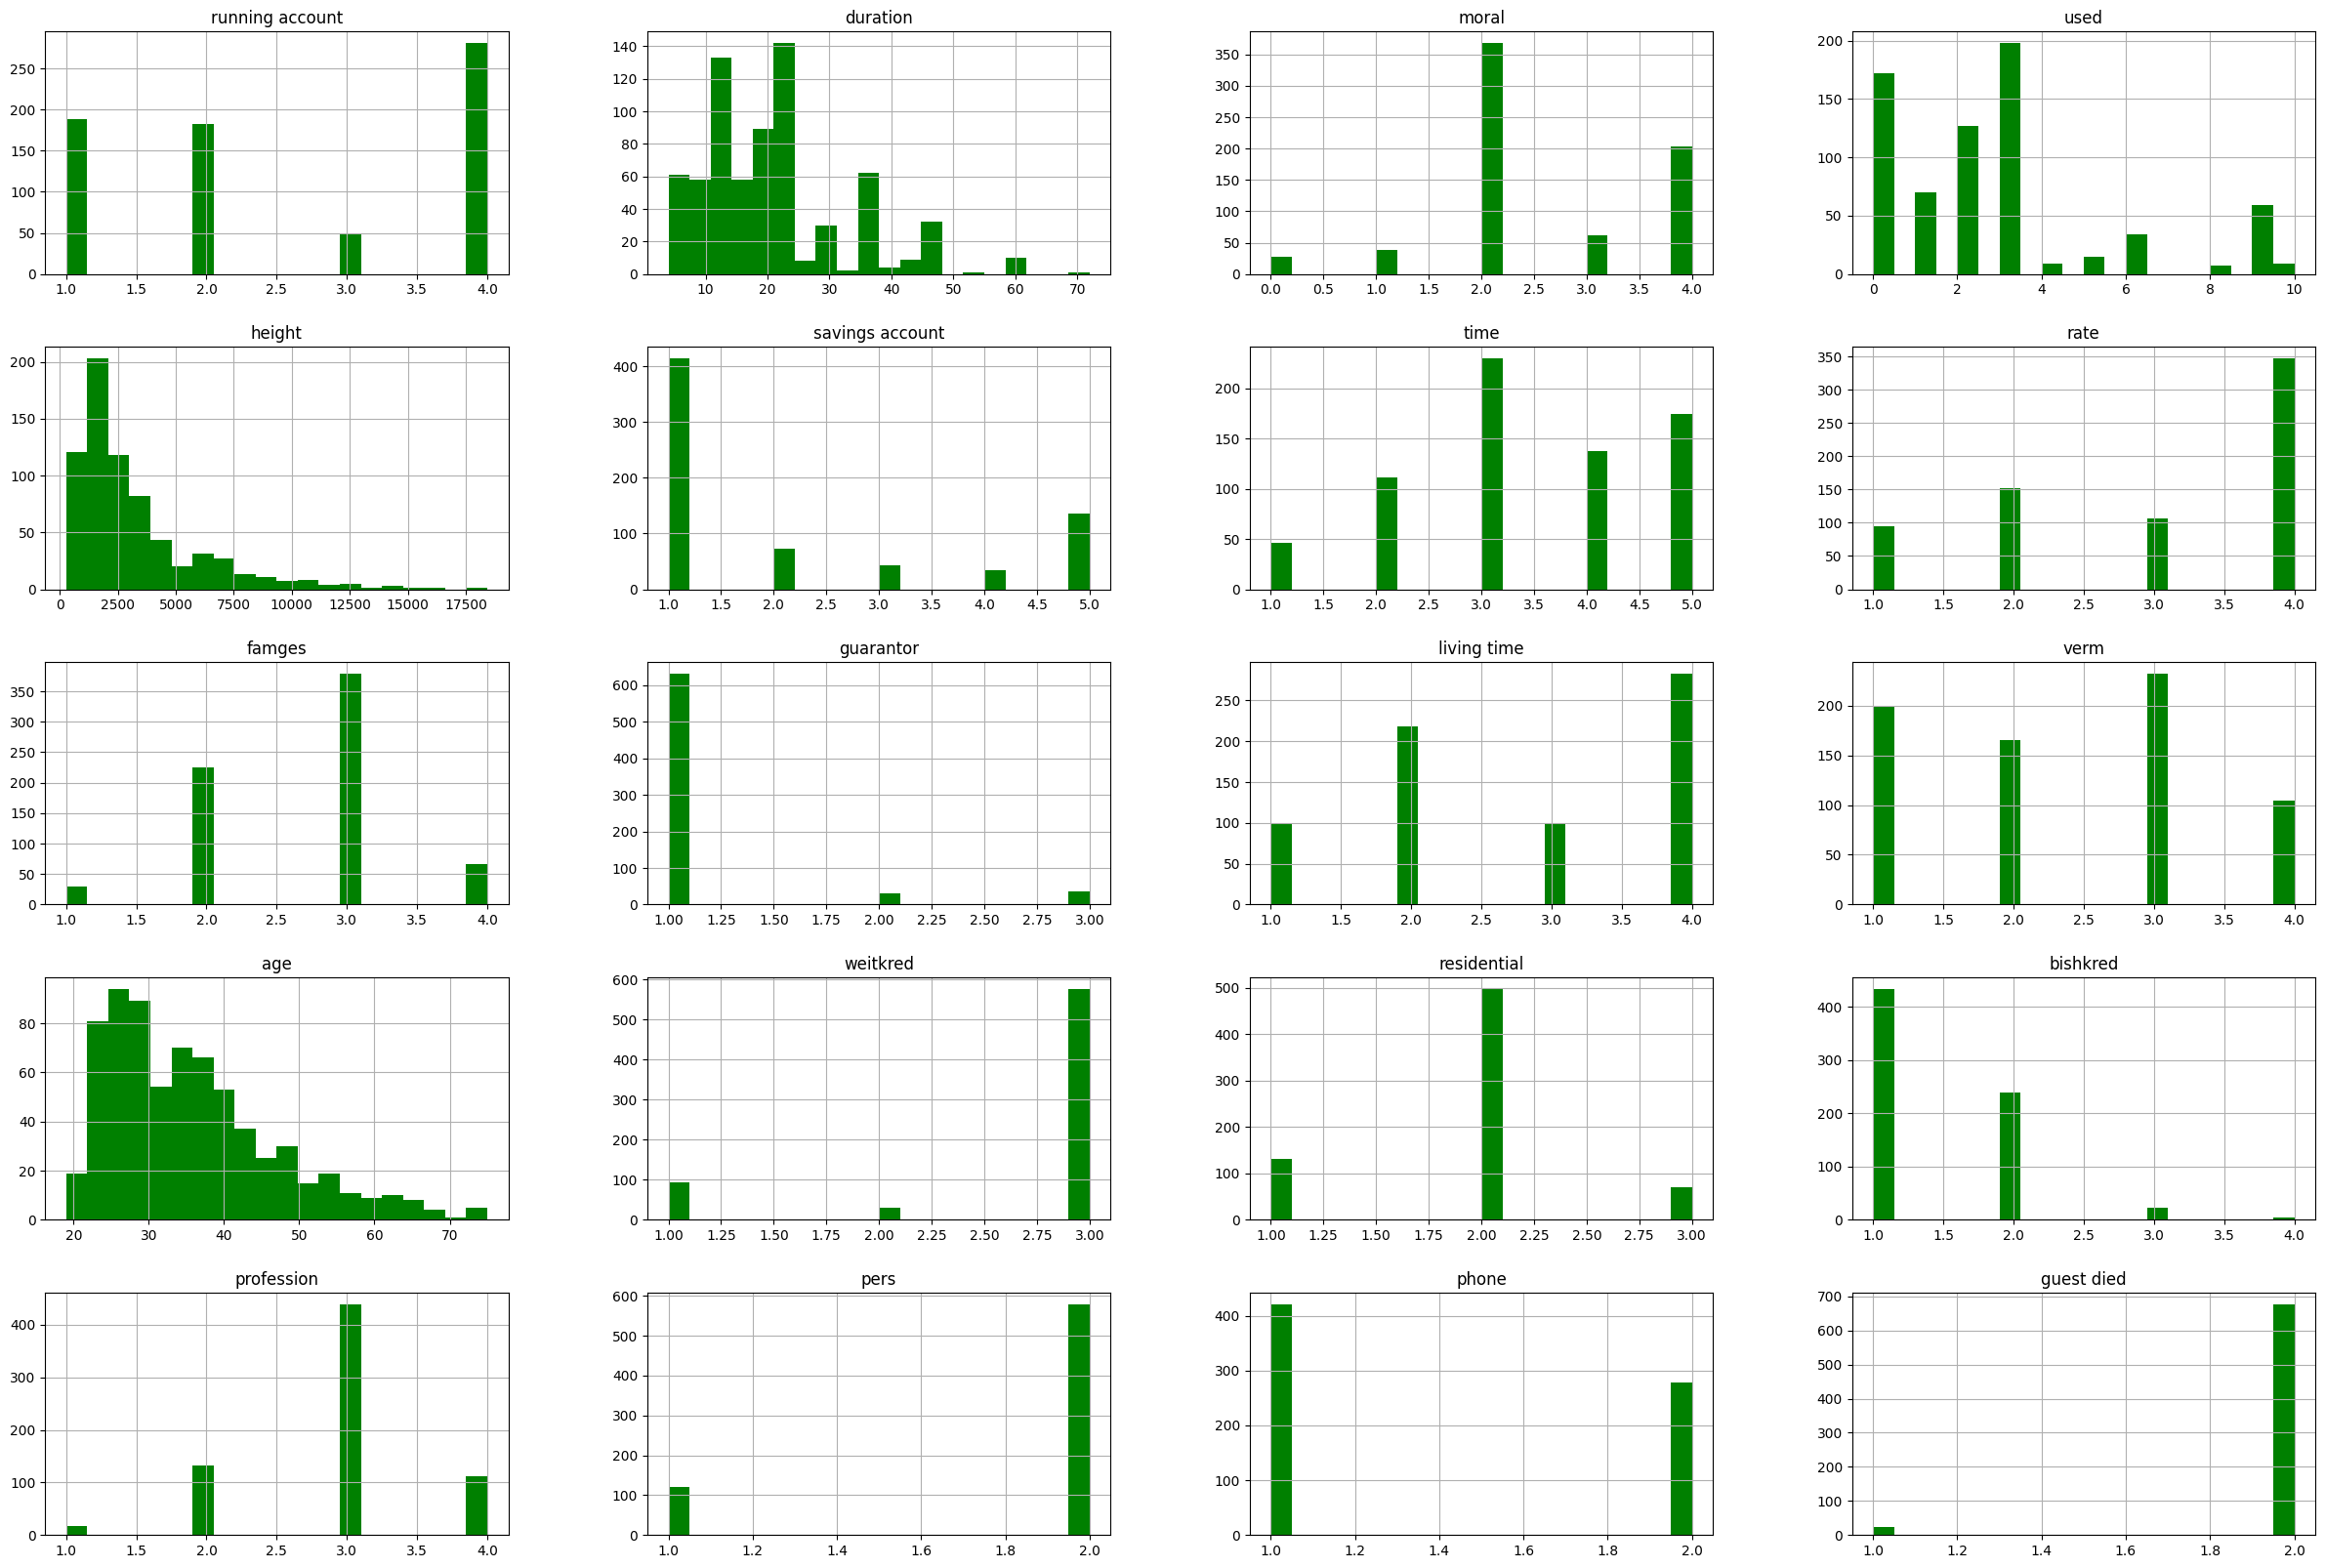

In [350]:
# Histograma para varibales numéricas
Xtrain.hist(figsize=(30,20), color='green',bins=20)
plt.show()

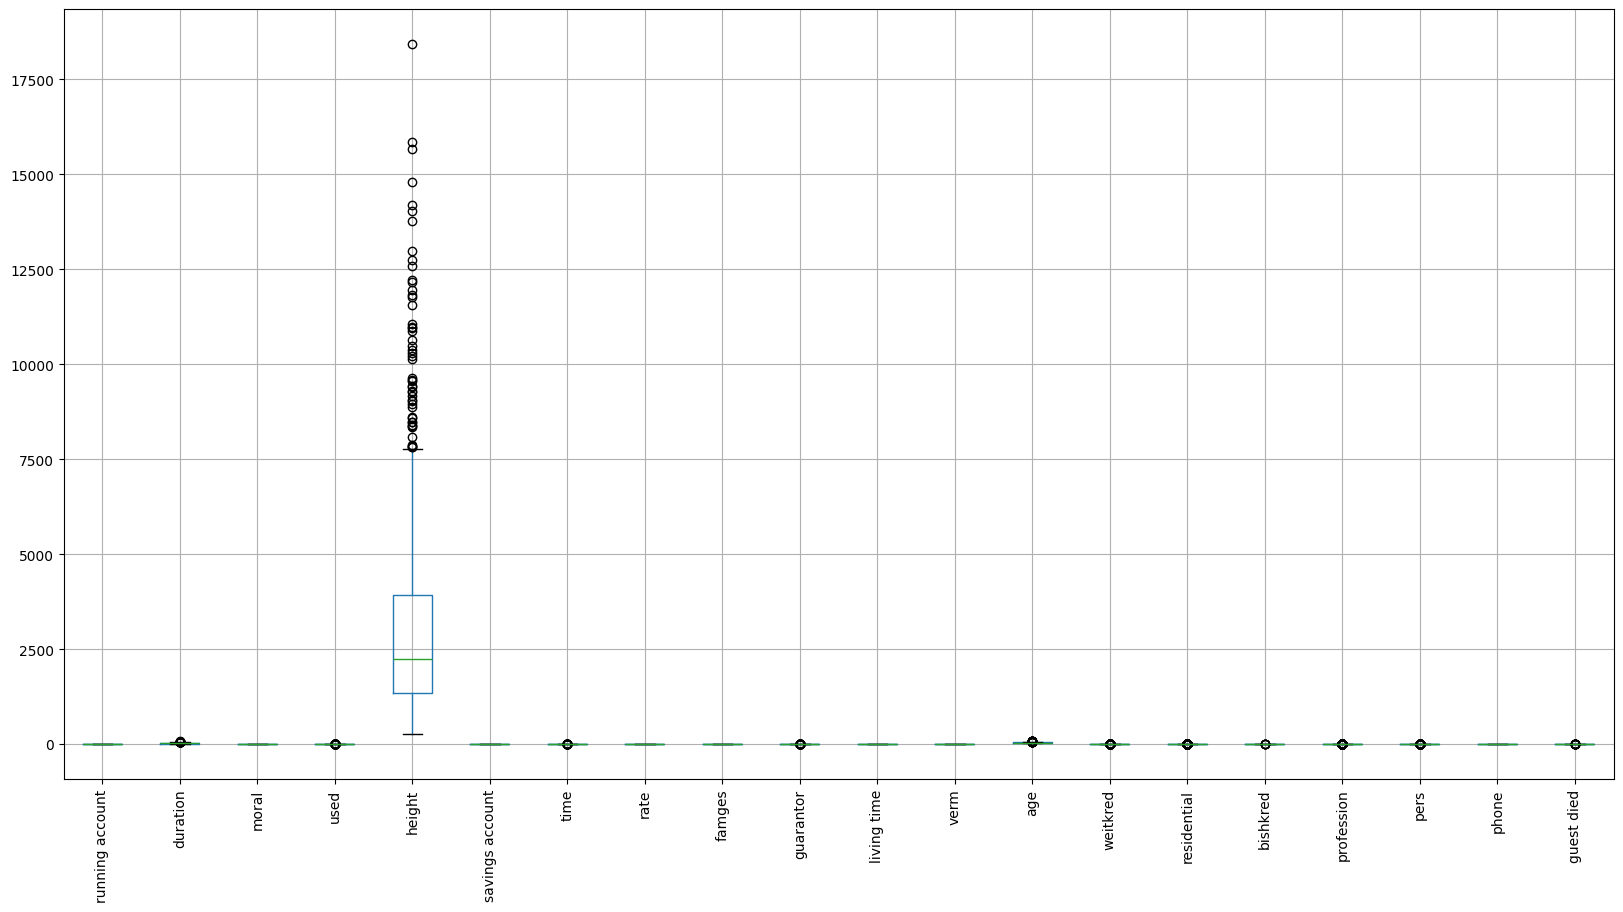

In [351]:
# Box Plots para variables numéricas
plt.figure(figsize=(20, 10))
Xtrain.boxplot(rot=90)
plt.show()

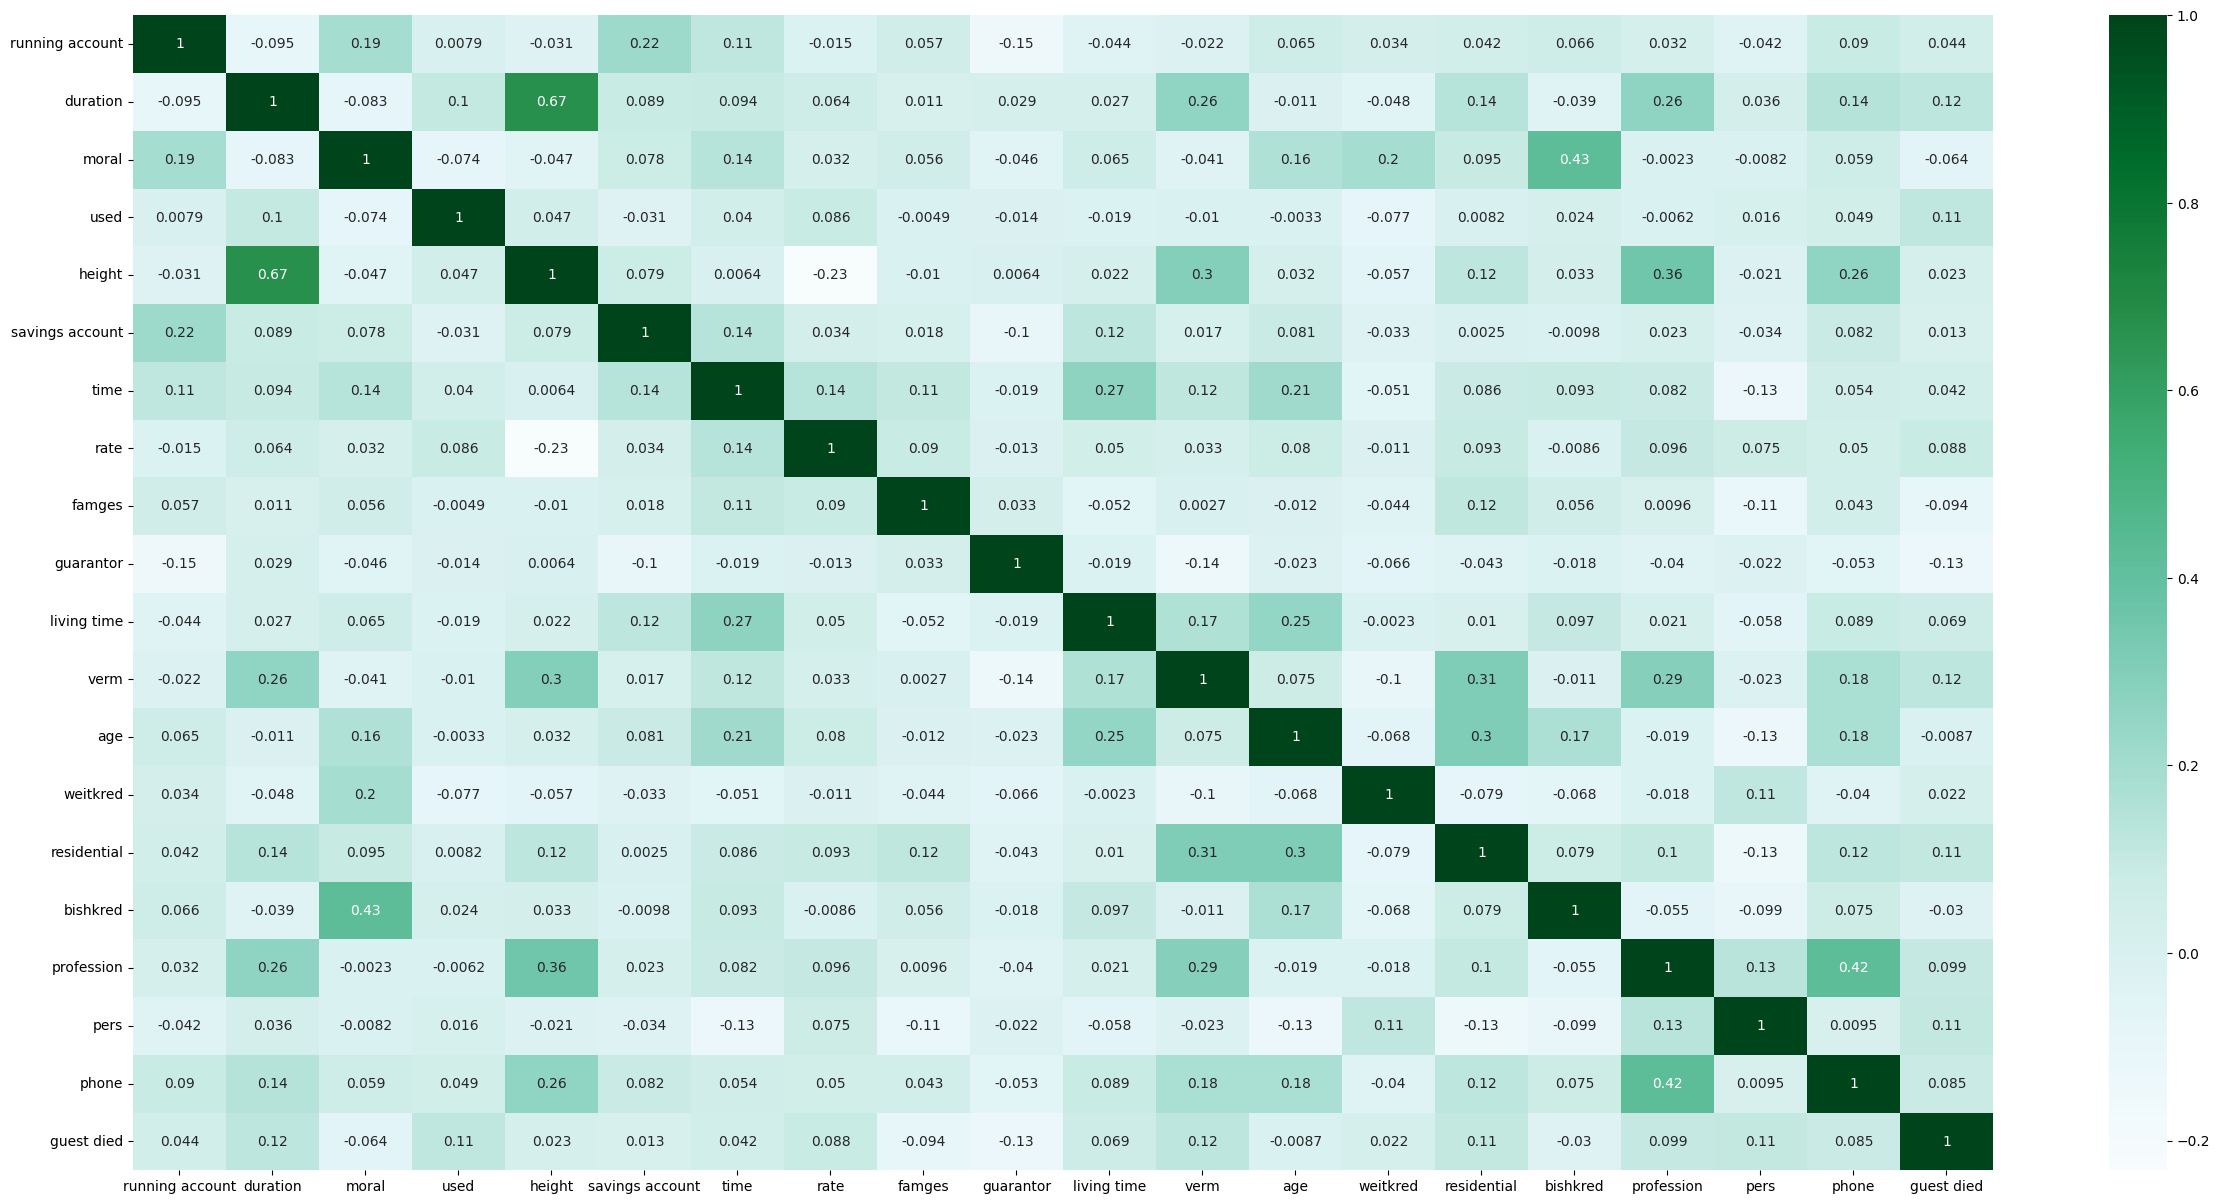

In [352]:
Xtrain_t1 = Xtrain.select_dtypes(include=['float64', 'int64'])
corr_matrix = round(Xtrain_t1.corr(method='pearson'), 4)

plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')
plt.show()

In [353]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Incluye aquí tu código:*****************************

# Variables numéricas:
numericas_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('transformer', PowerTransformer(method='yeo-johnson')),  # Normalización de la distribución
    ('scaler', StandardScaler())  # Escalar los datos a media 0 y desviación estándar 1
])
numericas_pipe_nombres = lista_paper_num

# Variables categóricas nominales:
nominales_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Codificación OneHot para variables nominales
])
nominales_pipe_nombres = lista_paper_cat

# Variables categóricas ordinales:
ordinales_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con el valor más frecuente
    ('ordinal', OrdinalEncoder())  # Codificación ordinal para mantener el orden jerárquico
])
ordinales_pipe_nombres = lista_paper_ord

# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[
    ('numericas', numericas_pipe, numericas_pipe_nombres),
    ('nominales', nominales_pipe, nominales_pipe_nombres),
    ('ordinales', ordinales_pipe, ordinales_pipe_nombres)],
    remainder='passthrough'  # Dejar sin procesar las columnas restantes
)

# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 6**

In [354]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y prueba
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:


# ************* Inlcuye aquí tu código:**************************

Xtraintest = pd.concat([Xtrain, Xtest], axis=0)
ytraintest = pd.concat([ytrain, ytest], axis=0)


# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 41)


## **Ejercicio 7**

In [355]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.


def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja y no esté sobreentrenado
  # con respecto a la métrica de la exatitud (accuracy).


  # Regresión Logística - Logistic Regression-LR:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', random_state=42))
  nombres.append('LR')




  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'))
  nombres.append('kNN')




  # Árbol de decisiones-DecisionTree-DT:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42))
  nombres.append('DTree')




  # Bosque Aleatorio-RandomForest-RF:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42))
  nombres.append('RF')




  # XGBoosting:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
  nombres.append('XGBoost')




  # Red neuronal de Perceptrón Multicapa-MLP:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.01, random_state=42))
  nombres.append('MLP')




  # Máquina de Vectores de Soporte-SVM:
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
  nombres.append('SVM')

  return modelos, nombres


# Técnica de submuestreo (undersampling) y/o sobremuestreo (versampling) utilizada:
mi_uoSampling = RandomOverSampler(random_state=42)

Xtv_uo, ytv_uo = mi_uoSampling.fit_resample(Xtraintest, ytraintest)



# *********** Aquí termina la sección de agregar código *******************





# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'miaccuracy':'accuracy','miprecision':'precision','mirecall':'recall',
                 'mifi':'f1','miauc':'roc_auc','migmean':make_scorer(geometric_mean_score)}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uo,
                          ytv_uo,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_miaccuracy 0.713 (0.032)
	 train_miaccuracy 0.738 (0.010)
	 test_miprecision 0.717 (0.036)
	 train_miprecision 0.741 (0.011)
	 test_mirecall 0.708 (0.040)
	 train_mirecall 0.730 (0.011)
	 test_mifi 0.712 (0.032)
	 train_mifi 0.736 (0.010)
	 test_miauc 0.788 (0.029)
	 train_miauc 0.820 (0.007)
	 test_migmean 0.713 (0.032)
	 train_migmean 0.738 (0.010)
>> kNN
	 test_miaccuracy 0.707 (0.032)
	 train_miaccuracy 0.816 (0.006)
	 test_miprecision 0.687 (0.029)
	 train_miprecision 0.782 (0.006)
	 test_mirecall 0.760 (0.047)
	 train_mirecall 0.875 (0.009)
	 test_mifi 0.721 (0.034)
	 train_mifi 0.826 (0.006)
	 test_miauc 0.774 (0.025)
	 train_miauc 0.903 (0.005)
	 test_migmean 0.704 (0.032)
	 train_migmean 0.814 (0.006)
>> DTree
	 test_miaccuracy 0.717 (0.027)
	 train_miaccuracy 0.766 (0.011)
	 test_miprecision 0.691 (0.040)
	 train_miprecision 0.731 (0.038)
	 test_mirecall 0.799 (0.101)
	 train_mirecall 0.853 (0.079)
	 test_mifi 0.736 (0.038)
	 train_mifi 0.783 (0.018)
	 test_miauc

## **Ejercicio 8**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**